<font size= 3><b>Marion Coutarel</b><br>
[Open Classrooms](https://openclassrooms.com/fr/paths/324-data-analyst)   
    <right> Parcours Data Analyst V2 - Projet 5</right><br>
    Juin 2021</font>

<img src="data/logoBottleNeck.png" title="logo Bottleneck"  width="300" />

In [1]:
%%html
<style>
p{font-size : 1.5em}
b{color:#AD283B}
a{color:#4a824b}
h1{color : #AD283B ; font-family: cursive, Verdana, sans-serif; text-shadow:1px 1px grey}
h2{font-family: cursive, Verdana, sans-serif; text-shadow:1px 1px grey;}
h3{color: #4a824b; text-shadow:1px 1px #e2e2e2}
h4{color: #000283}   
</style>

In [2]:
#theme colours
colours = ['#AD283B', '#4a824b'] 

<h1>Librairies</h1>

In [3]:
import lux
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
import seaborn as sns

In [4]:
pd.set_option('display.max_colwidth',None)

In [5]:
lux.config.default_display = "pandas"

<h1> importation des données</h1>

<h2> Données de liaisons </h2>

<h3>importation du fichier de liaison préparer par Sylvie</h3>

In [6]:
liaison=pd.read_excel('data/liaison.xlsx')


In [7]:
liaison

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


<h3> profiler les données</h3>

<h4>Taille et type des données</h4>

In [8]:
liaison.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


<h4>Vérification des données manquantes (en vert)</h4>

<AxesSubplot:>

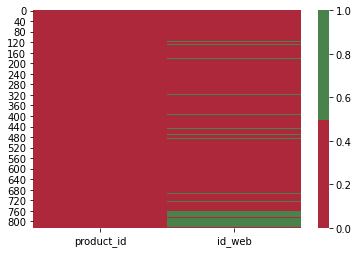

In [9]:
sns.heatmap(liaison[liaison.columns].isnull(), cmap=sns.color_palette(colours))


<h4>références de produits pour lesquelles nous n'avons pas la correspondance web</h4>

In [10]:
product_id_manquant=liaison.loc[liaison.id_web.isnull(),:]

<h4> suppression des lignes pour lesquelles nous n'avons pas de correspondances</h4>

In [11]:
liaison.dropna(inplace=True)

In [12]:
print('nombre de valeur unique dans la colonne product_id:')
print("{}%".format(liaison.product_id.nunique()*100/len(liaison)))
print('nombre de valeur unique dans la colonne id_web:')
print("{}%".format(liaison.id_web.nunique()*100/len(liaison)))


nombre de valeur unique dans la colonne product_id:
100.0%
nombre de valeur unique dans la colonne id_web:
100.0%


<h2> données ERP</h2>

<h3> importation des données</h3>

In [13]:
ERP=pd.read_excel('data/erp.xlsx')
ERP

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h3> profilage des données</h3>

<h4> vérification des données manquantes  </h4>

In [14]:
for col in ERP.columns:
    pct_missing = np.mean(ERP[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

product_id - 0%
onsale_web - 0%
price - 0%
stock_quantity - 0%
stock_status - 0%


In [15]:
ERP.shape

(825, 5)

In [16]:
ERP.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [17]:
ERP.onsale_web.unique()

array([1, 0], dtype=int64)

In [18]:
ERP.stock_status.unique()

array(['outofstock', 'instock'], dtype=object)

In [19]:
ERP.stock_quantity.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
ERP.stock_quantity.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<font color= red> pourquoi un stock à zéro et un status instock ?</color>

In [21]:
ERP.query("stock_quantity==0 & stock_status=='instock'")

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [22]:
ERP.query("stock_quantity!=0 & stock_status=='outofstock'")

,product_id,onsale_web,price,stock_quantity,stock_status


In [23]:
CheckERP= list(set(liaison.product_id.unique()).difference(ERP.product_id.unique()))
CheckERP

[]

<h2> Données web</h2>

<h3> importation des données</h3>

In [24]:
WEB=pd.read_excel('data/web.xlsx')

In [25]:
WEB.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [26]:
WEB

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/mouthes-le-bihan-aime-chai-2015.jpg,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/camin-larredya-jurancon-sec-la-virada-2018.jpg,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/jamet-cote-rotie-fructus-voluptas-2018.jpg,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/clos-du-mont-olivet-chateauneuf-du-pape-2007-2.jpg,0.0,attachment,image/jpeg,0.0


<h3>profilage des données</h3>

<h4> données manquantes</h4>

In [27]:
for col in WEB.columns:
    pct_missing = np.mean(WEB[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

sku - 6%
virtual - 0%
downloadable - 0%
rating_count - 0%
average_rating - 5%
total_sales - 5%
tax_status - 53%
tax_class - 100%
post_author - 5%
post_date - 5%
post_date_gmt - 5%
post_content - 100%
post_title - 5%
post_excerpt - 53%
post_status - 5%
comment_status - 5%
ping_status - 5%
post_password - 100%
post_name - 5%
post_modified - 5%
post_modified_gmt - 5%
post_content_filtered - 100%
post_parent - 5%
guid - 5%
menu_order - 5%
post_type - 5%
post_mime_type - 53%
comment_count - 5%


4 colonnes sont vides: tax_class, post_content, post_password, post_content_filtered. Nous les supprimons

In [28]:
WEB.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], axis=1, inplace=True)

In [29]:
for col in WEB.columns:
    N_unique= WEB[col].nunique()
    if N_unique ==1 :
        valeur_unique= WEB[col].unique()
        print('{}-{}'.format(col,valeur_unique))

virtual-[0]
downloadable-[0]
rating_count-[0]
average_rating-[ 0. nan]
tax_status-['taxable' nan]
post_status-['publish' nan]
comment_status-['closed' nan]
ping_status-['closed' nan]
post_parent-[ 0. nan]
menu_order-[ 0. nan]
post_mime_type-[nan 'image/jpeg']
comment_count-[ 0. nan]


12 colonnes ne contiennent pas ou peu d'information. Pour l'instant je conserve 'tax-status'. le reste est supprimé

In [30]:
WEB.drop(['virtual', 'downloadable', 'rating_count', 'average_rating', 'post_status',
        'comment_status', 'ping_status', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count'], axis = 1, inplace = True)

certains rang sont vides. On les supprime.

In [32]:
WEB.dropna(how='all', inplace=True)

In [33]:
WEB.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 1430 entries, 0 to 1512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1430 non-null   float64       
 2   tax_status         716 non-null    object        
 3   post_author        1430 non-null   float64       
 4   post_date          1430 non-null   datetime64[ns]
 5   post_date_gmt      1430 non-null   datetime64[ns]
 6   post_title         1430 non-null   object        
 7   post_excerpt       716 non-null    object        
 8   post_name          1430 non-null   object        
 9   post_modified      1430 non-null   datetime64[ns]
 10  post_modified_gmt  1430 non-null   datetime64[ns]
 11  guid               1430 non-null   object        
 12  post_type          1430 non-null   object        
dtypes: datetime64[ns](4), float64(2), object(7)
memory usage: 156.4

On a encore 2 rangs sans sku. Je les mets de côté et je les supprime du DF

In [34]:
WEB_sku_null = WEB[WEB.sku.isnull()]

In [35]:
WEB[WEB.sku.isnull()]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id=""u1194-84"">e</span>.",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product


In [36]:
WEB=WEB[WEB.sku.notna()]

In [37]:
WEB.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1428 non-null   float64       
 2   tax_status         714 non-null    object        
 3   post_author        1428 non-null   float64       
 4   post_date          1428 non-null   datetime64[ns]
 5   post_date_gmt      1428 non-null   datetime64[ns]
 6   post_title         1428 non-null   object        
 7   post_excerpt       714 non-null    object        
 8   post_name          1428 non-null   object        
 9   post_modified      1428 non-null   datetime64[ns]
 10  post_modified_gmt  1428 non-null   datetime64[ns]
 11  guid               1428 non-null   object        
 12  post_type          1428 non-null   object        
dtypes: datetime64[ns](4), float64(2), object(7)
memory usage: 156.2

<h4> Colonne sku </h4>


L'ensemble des sku sont dans le fichier liaison (l'inverse n'est pas vrai)

In [38]:
CheckSKU= list(set(WEB.sku.unique()).difference(liaison.id_web.unique()))
CheckSKU

[]

In [127]:
list(set(liaison.id_web.unique()).difference(WEB.sku.unique()))

[13577,
 14730,
 15630,
 14360,
 15272,
 14377,
 15529,
 14379,
 15154,
 14648,
 12601,
 14785,
 13771,
 15065,
 14689,
 15586,
 '14680-1',
 15608,
 15609,
 14715]

In [39]:
liaison.query('id_web=="bon-cadeau-25-euros"')

,product_id,id_web
443,4954,bon-cadeau-25-euros


<h4>Profilage des colonnes</h4>

Post_author ne contient que 2 données et seulement 2 viennent de l'auteur "1.0". La colonne semble donc peu pertinente. On la supprime.

In [40]:
WEB.query('post_author==1.')

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product
1209,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/2020/03/bon-cadeau-de-25-euros.jpg,attachment


Dans le brief, Laurent nous explique que les dates ne sont pas pertinentes. On les supprime aussi.

In [41]:
colDate=['post_date','post_date_gmt','post_modified','post_modified_gmt']
WEB[colDate]

,post_date,post_date_gmt,post_modified,post_modified_gmt
0,2018-06-01 13:53:46,2018-06-01 11:53:46,2018-06-01 14:13:57,2018-06-01 12:13:57
1,2018-02-08 12:58:52,2018-02-08 11:58:52,2019-12-30 09:30:29,2019-12-30 08:30:29
2,2018-02-08 13:49:41,2018-02-08 12:49:41,2019-12-21 09:00:17,2019-12-21 08:00:17
3,2018-02-08 14:08:36,2018-02-08 13:08:36,2020-06-26 18:15:03,2020-06-26 16:15:03
4,2018-02-09 14:01:05,2018-02-09 13:01:05,2020-01-04 16:36:01,2020-01-04 15:36:01
...,...,...,...,...
1508,2020-04-25 13:22:38,2020-04-25 11:22:38,2020-08-26 17:35:03,2020-08-26 15:35:03
1509,2020-05-02 14:53:40,2020-05-02 12:53:40,2020-08-26 17:35:02,2020-08-26 15:35:02
1510,2020-05-02 15:00:54,2020-05-02 13:00:54,2020-08-14 18:15:03,2020-08-14 16:15:03
1511,2020-06-09 15:42:04,2020-06-09 13:42:04,2020-07-20 17:09:06,2020-07-20 15:09:06


La colonne guid ne semble pas pertinente non plus (liens cassés).

In [42]:
WEB.columns.tolist()

['sku',
 'total_sales',
 'tax_status',
 'post_author',
 'post_date',
 'post_date_gmt',
 'post_title',
 'post_excerpt',
 'post_name',
 'post_modified',
 'post_modified_gmt',
 'guid',
 'post_type']

In [43]:
WEB.drop(['post_author','post_date','post_date_gmt','post_modified','post_modified_gmt','guid'],axis=1, inplace= True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
WEB

,sku,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
0,bon-cadeau-25-euros,10.0,taxable,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",bon-cadeau-de-25-euros,product
1,15298,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",pierre-jean-villa-saint-joseph-preface-2018,product
2,15296,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,pierre-jean-villa-saint-joseph-tilde-2017,product
3,15300,0.0,taxable,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",pierre-jean-villa-croze-hermitage-accroche-coeur-2018,product
4,19814,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,pierre-jean-villa-igp-gamine-2018,product
...,...,...,...,...,...,...,...
1508,16135,5.0,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,mouthes-le-bihan-aime-chai-2015,attachment
1509,15891,0.0,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,camin-larredya-jurancon-sec-la-virada-2018,attachment
1510,15887,0.0,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,jamet-cote-rotie-fructus-voluptas-2018,attachment
1511,13127-1,0.0,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,attachment


<h1>Fusion</h1>

<h2> Fusion ERP-Liaison</h2>

In [45]:
ERP.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [46]:
liaison.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [47]:
Fusion=pd.merge(ERP, liaison, how='left', on ='product_id')

In [48]:
Fusion

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

On note que comme anticipé nous avons des id_web manquant

<h2> Fusion avec le fichier WEB </h2>

In [49]:
WebSales= pd.merge(Fusion, WEB, how='inner', left_on='id_web', right_on='sku')

In [50]:
WebSales

C:\Users\mario\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:250: UserWarning:
Lux detects that the attribute 'sku' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'sku' into a uniform type as follows:
	df['sku'] = df['sku'].astype(str)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

On a le même nombre de rang que dans le df WEB

<h2> Vérification du df <b> WebSales</b> </h2>

<h3> suppression des colonnes inutiles</h3>

In [51]:
WebSales.drop(['sku','id_web'], axis=1, inplace =True)

In [52]:
WebSales.onsale_web.nunique()

1

In [53]:
WebSales.drop('onsale_web', axis=1, inplace=True)

<h3> dédoublonnage massif</h3>

In [54]:
WebSales.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1428 non-null   int64  
 1   price           1428 non-null   float64
 2   stock_quantity  1428 non-null   int64  
 3   stock_status    1428 non-null   object 
 4   total_sales     1428 non-null   float64
 5   tax_status      714 non-null    object 
 6   post_title      1428 non-null   object 
 7   post_excerpt    714 non-null    object 
 8   post_name       1428 non-null   object 
 9   post_type       1428 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 122.7+ KB


In [55]:
WebSales

,product_id,price,stock_quantity,stock_status,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
0,3847,24.2,0,outofstock,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",pierre-jean-villa-saint-joseph-preface-2018,product
1,3847,24.2,0,outofstock,6.0,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,pierre-jean-villa-saint-joseph-preface-2018,attachment
2,3849,34.3,0,outofstock,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,pierre-jean-villa-saint-joseph-tilde-2017,product
3,3849,34.3,0,outofstock,0.0,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,pierre-jean-villa-saint-joseph-tilde-2017,attachment
4,3850,20.8,0,outofstock,0.0,taxable,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",pierre-jean-villa-croze-hermitage-accroche-coeur-2018,product
...,...,...,...,...,...,...,...,...,...,...
1423,7025,69.0,2,instock,0.0,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,jamet-cote-rotie-fructus-voluptas-2018,attachment
1424,7247,54.8,23,instock,0.0,taxable,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche florale et un parfum de vendange entière. Il évolue sur une note d'agrume. Bouche avec du relief et une belle énergie. Il y a du muscle mais accompagné par une sensation de fruit plein et dense.",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product
1425,7247,54.8,23,instock,0.0,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,attachment
1426,7338,16.3,45,instock,0.0,taxable,Domaine Saint-Nicolas Vin de France Blanc Les Clous 2019,"Issu d'un assemblage de chenin blanc et de chardonnay, ce vin présente des notes iodées ainsi que des arômes de fleurs blanches. En bouche, un vin d'une grande tension se dévoile, avec des saveurs salées et une fine amertume.",domaine-saint-nicolas-fiefs-vendeens-blanc-les-clous-2019,product


In [56]:
att=WebSales.query("post_type=='attachment'").reset_index()

In [57]:
prod=WebSales.query("post_type=='product'").reset_index()

In [58]:
att.compare(prod)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux does not currently support dataframes with hierarchical indexes.
Please convert the dataframe into a flat table via `pandas.DataFrame.reset_index`.



index       tax_status          post_excerpt  \
     self other       self    other         self   
0       1     0        NaN  taxable          NaN   
1       3     2        NaN  taxable          NaN   
2       5     4        NaN  taxable          NaN   
3       7     6        NaN  taxable          NaN   
4       9     8        NaN  taxable          NaN   
..    ...   ...        ...      ...          ...   
709  1419  1418        NaN  taxable          NaN   
710  1421  1420        NaN  taxable          NaN   
711  1423  1422        NaN  taxable          NaN   
712  1425  1424        NaN  taxable          NaN   
713  1427  1426        NaN  taxable          NaN   

                                                                                                                                                                                                                                                                                                                      \
                                                                                                                                                                                                                                                                                                               other   
0                                                                                                                                                                      Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.   
1                                                                                                                          Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !   
2                                                                                                                                                                                                                          Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.   
3                                                                                                                                                                         Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.   
4                                                                                                              Le côte rôtie Carmina monte en puissance mais garde un milieu de bouche pulpeux aux tanins aboutis. En référence à Carmina Burana, ce Côte Rôtie associe puissance, pureté, complexité et sensualité.   
..                                                                                                                                                                                                                                                                                                               ...   
709                              Belle robe jeune à dominante rubis soutenue. Nez fruité, avec des notes de fruits  confits, de confiture, de fruits noirs, épicé, poivré et mentholé. Bouche charnue, vin plein, dense, fruité, fumé, finissant sur des tanins tactiles et croquants Un vin de repas entre copains!   
710  L'exotisme du nez est complété par d'élégantes et complexes notes de pistache et d'amande amère. La fraîcheur apparaît tendue, millimétrée, et empreinte de pureté. La mandarine, l'orange, les fruits exotiques apportent des arômes gourmands. L'allonge s'étire sans perdre d'éclat. Un modèle de précision.   
711                                                                                                                                                                            Pour cette cuvée, Jean-Paul Jame

il semble qu'il y ait un doublonnage entre les post_type attachment et product. product contenant plus l'info, on garde ces lignes et on drop la colonne.

In [59]:
WebSales = WebSales.query("post_type=='product'")

In [60]:
WebSales.drop('post_type', axis=1, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<h3>suppression colonnes inutiles (2)</h3>

In [61]:
for col in WebSales.columns:
    N_unique= WebSales[col].nunique()
    if N_unique <=1 :
        valeur_unique= WebSales[col].unique()
        print('{}-{}'.format(col,valeur_unique))

tax_status-['taxable']


Il n'y a plus qu'un status de taxe. On drop la colonne et post_name (moins lisible que post_title)

In [62]:
WebSales.drop(['tax_status', 'post_name'], axis=1, inplace=True)

On peut lever l'ambiguité sur le stock_status car l'entrée concernée est 'bon cadeau de 25€' on comprends qu'il n'y ai pas besoin d'avoir de stock pour que ce soit disponible à la vente. Je drop la colonne stock_status

In [63]:
WebSales.query("stock_quantity==0 & stock_status=='instock'")

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt
820,4954,25.0,0,instock,10.0,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !"


In [64]:
WebSales.drop('stock_status',axis=1, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:

WebSales

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h3>Derniers doublons</h3>

In [66]:
WebSales.post_title.nunique()

711

In [67]:
WebSales.post_title.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [68]:
WebSales.query("post_title in ['Clos du Mont-Olivet Châteauneuf-du-Pape 2007','Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016','Domaine Hauvette IGP Alpilles Jaspe 2017']").sort_values(by='post_title')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

On a trois couples d'entrées avec le même nom mais pas le même product_id. On va devoir traiter les choses couple par couple.

<h4> Domaine Hauvette IGP Alpilles Jaspe 2017</h4>

In [69]:
WebSales.query("post_title =='Domaine Hauvette IGP Alpilles Jaspe 2017'")

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,total_sales,post_title,post_excerpt
368,4288,26.7,8,1.0,Domaine Hauvette IGP Alpilles Jaspe 2017,"Un magnifique blanc 100% Roussanne avec une fraîcheur, de l'élégance et de la gourmandise. Un grand blanc du Sud !"
1396,6665,27.7,8,1.0,Domaine Hauvette IGP Alpilles Jaspe 2017,"Un magnifique blanc 100% Roussanne avec une fraîcheur, de l'élégance et de la gourmandise. Un grand blanc du Sud !"


Nous avons 2 product_id différents et 2 prix différents. Le reste est identique.<br><br>
Nous supposons qu'il y a eu un changement de prix et que cela a généré une nouvelle entrée. Je vais donc affecter la moyenne des prix au product_ID 4288 et supprimer l'entrée product_ID 6665.

In [70]:
WebSales.loc[368,'price']= 27.2

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
WebSales.loc[368,'total_sales']= 2

In [72]:
WebSales.drop(1396, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<h4>Marc Colin Et Fils Chassagne-Montrachet Blanc les vides-bourses 1er cru 2016</h4>

In [73]:
WebSales.query("post_title =='Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016'")


C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,total_sales,post_title,post_excerpt
458,4597,61.6,0,2.0,Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016,"Ce Chassagne Montrachet se révèle être un vin assez expressif, aux notes minérales et d’agrumes. La bouche est généreuse et longue. C’est un vin d’une grande élégance, un digne représentant de l’appellation."
980,5544,61.6,0,0.0,Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016,"Ce Chassagne Montrachet se révèle être un vin assez expressif, aux notes minérales et d’agrumes. La bouche est généreuse et longue. C’est un vin d’une grande élégance, un digne représentant de l’appellation."


Nous avons 2 entrées avec des product_id différents et des total_sales différentes. Le reste étant identique.<br><br>
Je supprime la ligne 980 .

In [74]:
WebSales.drop(980, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<h4>Clos du Mont-Olivet Châteauneuf-du-Pape 2007</h4>

In [75]:
WebSales.query("post_title in 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007'")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

ces 2 entrées sont plus problématiques. N'étant pas capable de dire si il s'agit de 2 vins différents et en tout cas quel est le bon stock. Nous gardons les 2. <br><br>

La partie nettoyage étant terminée on supprime la colonne 'post_excerpt' qui ne nous sera pas utile pour la suite. <br>Nous avons donc au final, un df <b>WebSales</b>  de 712 rangs et 5 colonnes.

In [76]:
WebSales.drop('post_excerpt', axis=1, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:3890: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<h1> Analyse des ventes Web</h1>

<h2> Chiffre d'affaire </h2>

<h3> Chiffre d'affaire au niveau global</h3>

On créé une colonne 'Revenue' qui contient le CA réalisé par chaque entrée

In [77]:
WebSales['Revenue']=WebSales.price*WebSales.total_sales

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3040: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
WebSales.query('Revenue>0').describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [79]:
print("Moyenne des prix de Ventes : ")
print(WebSales.Revenue.sum()/WebSales.query("Revenue>0").total_sales.sum())
print('CA Tot:')
print(WebSales.query("Revenue>0").Revenue.sum())
print('NB total Ventes :')
print(WebSales.query("Revenue>0").total_sales.sum())
print('part des ventes réalisées avec un prix inférieur à 18€: ')
print(WebSales.query("price<18").total_sales.sum()/WebSales.total_sales.sum())
print('part du CA généré par des ventes à des prix inférieur à 33.3€ : ')
print(WebSales.query("price<33.3").Revenue.sum()/WebSales.Revenue.sum())
print("nombre de références vendues:")
print(WebSales.query("Revenue>0").post_title.nunique())
print("nombre de référence proposées:")
print(WebSales.post_title.nunique())

Moyenne des prix de Ventes : 
24.631273996509602
CA Tot:
70568.6
NB total Ventes :
2865.0
part des ventes réalisées avec un prix inférieur à 18€: 
0.5019197207678883
part du CA généré par des ventes à des prix inférieur à 33.3€ : 
0.5052572957377643
nombre de références vendues:
384
nombre de référence proposées:
711


Text(0.5, 1.1, 'Relation entre CA, volume et prix de ventes sur le site internet')

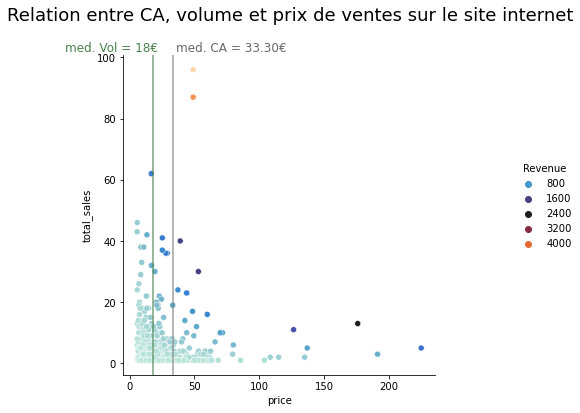

In [80]:
ax = sns.relplot(data=WebSales.query("Revenue >0 "), x='price', y='total_sales',
                 hue='Revenue', palette=sns.color_palette("icefire", as_cmap=True))

# mediane vente cumulée

ax2 = plt.axvline(18, color='#4a824b',
                  alpha=0.75)
plt.text(x=-50, y=102,
         s='med. Vol = 18€', fontsize=12, color='#4a824b')
# mediane CA cumulé
ax3 = plt.axvline(33.3, color='grey',
                  alpha=0.75)

plt.text(x=36, y=102,
         s='med. CA = 33.30€', fontsize=12, color='dimgrey')
#titre
ax.fig.suptitle(
    'Relation entre CA, volume et prix de ventes sur le site internet', y=1.1, fontsize=18)

Au total, le site web permet de réalisé un <b>chiffre d'affaire de 70k€</b> <br><br>avec un prix de vente moyen de <b>24.65 €</b> pour un peu plus de 2 800 produits vendus et 54% des références.
<br><br> Plus de <b>50% des ventes sont réalisées avec des produits à moins de 18€</b> 
<br><br> Plus de <b>50% du CA est réalisé avec des produits à moins de 33.30€ </b>



<h3> décompostion par produit </h3>

Plus de <b>50% du CA sont réalisés avec 32 références</b> <br><br>
Les <b>10 principales sources de CA représententent 28,4% de ce dernier</b>. 6 d'entre eux sont des champagnes.
<br><br> Il est évident que 2 références (<b>Champagne Gosset Grand Blanc de Blancs </b>et<b> Champagne Gosset Grand Rosé</b>) sortent du lot même si leur prix semble cohérent (<b> 12.7% CA</b>).

Text(0.25, 1.1, '32 produits réalisant plus de 50% du CA')

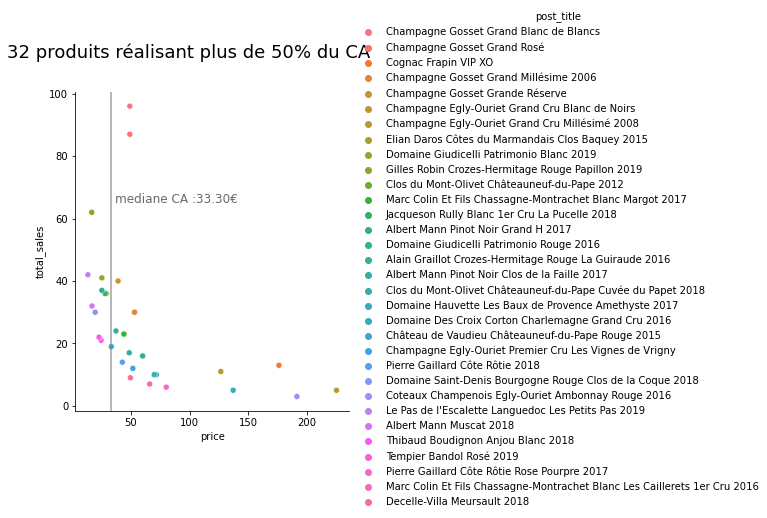

In [81]:
ax = sns.relplot(data=WebSales[['post_title', 'price', 'total_sales', 'Revenue']].query(
    "Revenue>0").sort_values(by="Revenue", ascending=False).head(32), x='price', y='total_sales', hue='post_title')
ax2= plt.axvline(33.3, color='grey',
                  alpha=0.75)
plt.text(x=36, y=65,
         s='mediane CA :33.30€', fontsize=12,color='dimgrey')
ax.fig.suptitle(
    '32 produits réalisant plus de 50% du CA',x=0.25, y=1.1, fontsize=18)

Text(0.5, 1.1, '10 produits générant le plus de CA - 28,4%')

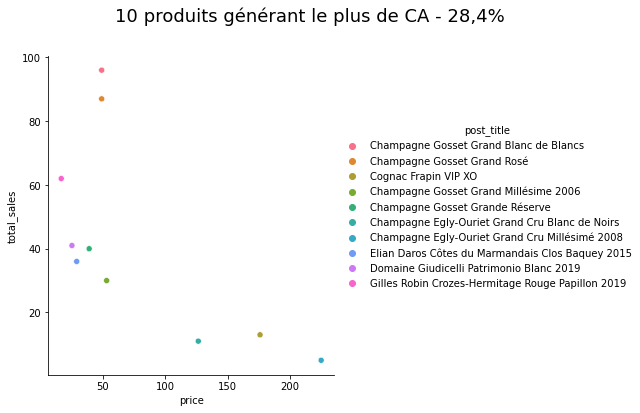

In [82]:
ax=sns.relplot(data=WebSales[['post_title', 'price', 'total_sales', 'Revenue']].query("Revenue>0").sort_values(
    by="Revenue", ascending=False).head(10), x='price', y='total_sales', hue='post_title')
ax.fig.suptitle( '10 produits générant le plus de CA - 28,4%',y=1.1, fontsize=18)

In [83]:
freq=[]
Nom=['champagne','Crozes','patrimonio','Marmandais', 'cognac', 'Châteauneuf-du-Pape','Chassagne-Montrachet','Rully','Pinot Noir','Provence','Corton Charlemagne','Côte Rôtie','Bourgogne Rouge', 'Ambonnay Rouge','Languedoc','Muscat','Anjou Blanc','Bandol Rosé','Meursault']
for nom in Nom:
    freq.append(WebSales.query("Revenue>0").sort_values(by="Revenue", ascending=False).head(32).post_title.str.contains(nom,case=False).sum())
    

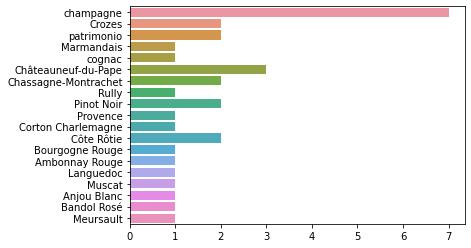

In [84]:
ax= sns.barplot(data= pd.DataFrame( freq , index= Nom), x=freq, 
             y=pd.DataFrame( freq , index= Nom).index)


In [85]:
freq2=[]
for nom in Nom:
    freq2.append(WebSales.query("Revenue>0").sort_values(by="Revenue", ascending=False).post_title.str.contains(nom,case=False).sum())
    

<AxesSubplot:>

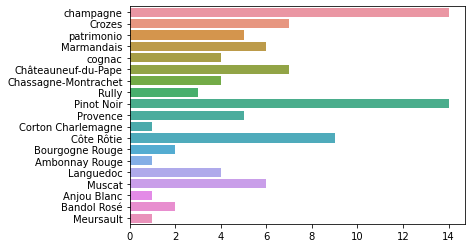

In [86]:
 sns.barplot(data= pd.DataFrame( freq2 , index= Nom), x=freq2, 
             y=pd.DataFrame( freq2 , index= Nom).index)

In [87]:
WebSales.sort_values(by="Revenue", ascending=False).Revenue.head(10).sum()/WebSales.Revenue.sum()

0.2838075291276857

In [88]:
WebSales.sort_values(by="Revenue", ascending=False).head(10).set_index('post_title')

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,total_sales,Revenue
post_title,,,,,
Champagne Gosset Grand Blanc de Blancs,4334,49.0,0,96.0,4704.0
Champagne Gosset Grand Rosé,4144,49.0,11,87.0,4263.0
Cognac Frapin VIP XO,4402,176.0,8,13.0,2288.0
Champagne Gosset Grand Millésime 2006,4142,53.0,8,30.0,1590.0
Champagne Gosset Grande Réserve,4141,39.0,1,40.0,1560.0
Champagne Egly-Ouriet Grand Cru Blanc de Noirs,4355,126.5,2,11.0,1391.5
Champagne Egly-Ouriet Grand Cru Millésimé 2008,4352,225.0,0,5.0,1125.0
Elian Daros Côtes du Marmandais Clos Baquey 2015,4153,29.0,0,36.0,1044.0
Domaine Giudicelli Patrimonio Blanc 2019,6206,25.2,120,41.0,1033.2


<Figure size 576x576 with 0 Axes>

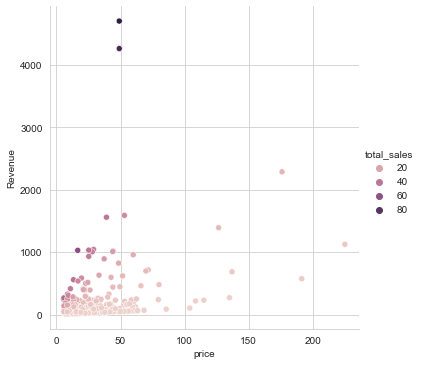

In [89]:
x=WebSales.query("Revenue>0").price
y=WebSales.query("Revenue>0").Revenue
s=WebSales.query('Revenue>0').total_sales
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.relplot(x=x,y=y,hue=s)

<Figure size 576x576 with 0 Axes>

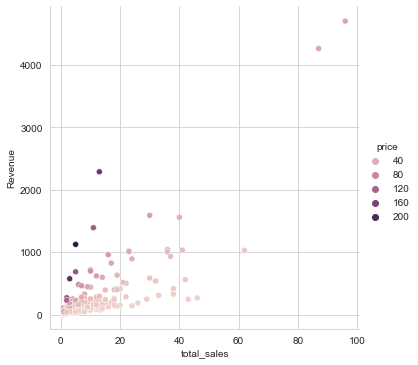

In [90]:
x=WebSales.query("Revenue>0 ").price
y=WebSales.query("Revenue>0 ").Revenue
s=WebSales.query('Revenue>0').total_sales
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.relplot(x=s,y=y,hue=x)

In [91]:
WebSales.sort_values(by="Revenue", ascending=False).head(32).query( "price > 100").Revenue.sum()/WebSales.Revenue.sum()


0.08592206732172665

In [92]:
WebSales.query("Revenue>0").sort_values(by="total_sales", ascending=False).head(20)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,total_sales,post_title,Revenue
388,4334,49.0,0,96.0,Champagne Gosset Grand Blanc de Blancs,4704.0
142,4144,49.0,11,87.0,Champagne Gosset Grand Rosé,4263.0
60,4068,16.6,157,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2
238,4200,5.8,190,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,266.8
194,4172,5.7,167,43.0,Maurel Pays d'Oc Chardonnay 2019,245.1
218,4187,13.3,90,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas 2019,558.6
1302,6206,25.2,120,41.0,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
138,4141,39.0,1,40.0,Champagne Gosset Grande Réserve,1560.0
648,4729,8.6,151,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,326.8
1250,6047,10.9,46,38.0,Château de La Liquière Faugères L'Ampoule 2019,414.2


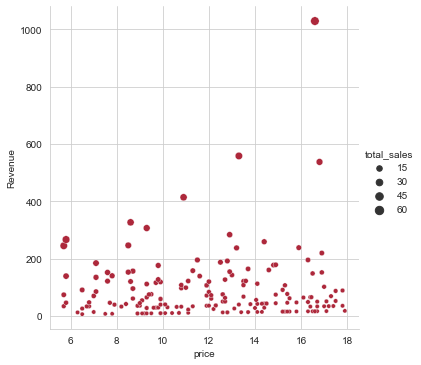

In [93]:
sns.relplot(data= WebSales.query('Revenue>0 & price <18'), x='price',y='Revenue', size='total_sales', color='#AD283B')

In [94]:
print("le taux de convertion de l'offre de bouteilles à moins de 18€ en achat est de {}% ".format(round(WebSales.query('Revenue>0 & price <18').post_title.nunique()*100/WebSales.query('price <18').post_title.nunique())))

le taux de convertion de l'offre de bouteilles à moins de 18€ en achat est de 70% 


<h2> Analyse des prix</h2>

In [95]:
WebSales.price.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Un premier coup d'oeil rapide montre notre gamme de produit a un <b> prix moyen de32,5 €</b>, avec <b>50% des références proposées à moins de 23,45€ </b>. Quelques références proposées plus chères tirent la moyennes. 

Text(-26.55, 0.025, 'mediane: 23.45€')

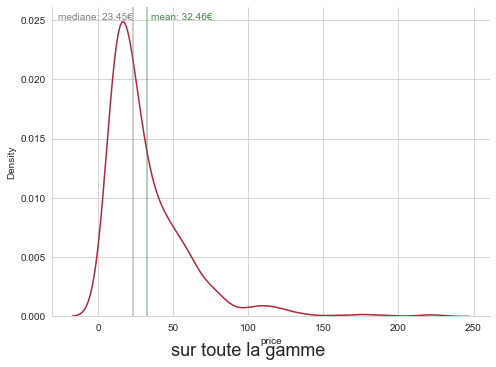

In [96]:
ax = sns.displot(data=WebSales, x='price', kind='kde',
                 color='#AD283B', height=5, aspect=1.4)
ax.fig.suptitle('sur toute la gamme', fontsize=18, y= 0.04)
#moyenne
ax2 = plt.axvline(WebSales.price.mean(), color='#4a824b',
                  alpha=0.5, label='mean')
plt.text(x=WebSales.price.mean()+3, y=0.025,
         s='mean: {:.2f}€'.format(WebSales.price.mean()), color='#4a824b')  
#Médiane
ax3 = plt.axvline(WebSales.price.quantile(0.5), color='grey', alpha=0.5)
plt.text(x=WebSales.price.quantile(0.5)-50, y=0.025,
         s='mediane: {:.2f}€'.format(WebSales.price.quantile(0.5)), color='grey')  

Text(-31.0, 0.03, 'mediane: 19.00€')

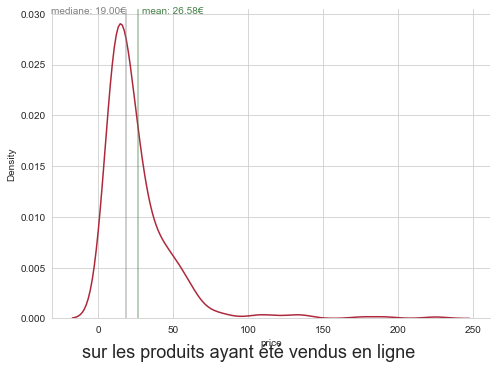

In [97]:
ax = sns.displot(data=WebSales.query("Revenue>0"), x='price', kind='kde',
                 color='#AD283B', height=5, aspect=1.4)
ax.fig.suptitle('sur les produits ayant été vendus en ligne', fontsize=18, y= 0.04)
#moyenne
ax2 = plt.axvline(WebSales.query("Revenue>0").price.mean(), color='#4a824b',
                  alpha=0.5, label='mean')
plt.text(x=WebSales.query("Revenue>0").price.mean()+3, y=0.03,
         s='mean: {:.2f}€'.format(WebSales.query("Revenue>0").price.mean()), color='#4a824b')  
#Médiane
ax3 = plt.axvline(WebSales.query("Revenue>0").price.quantile(0.5), color='grey', alpha=0.5)
plt.text(x=WebSales.query("Revenue>0").price.quantile(0.5)-50, y=0.03,
         s='mediane: {:.2f}€'.format(WebSales.query("Revenue>0").price.quantile(0.5)), color='grey')  

In [98]:
print("Gamme complète vendue en ligne")
print("coef d'assymétrie:")
print(WebSales.price.skew())
print("coef d'applatissement :")
print(WebSales.price.kurtosis())
print("Produits ayant été vendu en ligne")
print("coef d'assymétrie:")
print(WebSales.query("Revenue>0").price.skew())
print("coef d'applatissement :")
print(WebSales.query("Revenue>0").price.kurtosis())


Gamme complète vendue en ligne
coef d'assymétrie:
2.5854684450399055
coef d'applatissement :
10.104339239492381
Produits ayant été vendu en ligne
coef d'assymétrie:
3.714882099572873
coef d'applatissement :
20.132338986119123


<h3>Détection des outliers:  Méthode des écarts interquartiles</h3>

Selon la méthodes des écarts interquartiles, <b>toute bouteille vendue plus de 84,20€ </b>est un outlier. Graphiquement, on peut le représenter par une boite à moustache ou un graphique à densité de point

In [99]:
Q1=WebSales.price.quantile(0.25)
Q2=WebSales.price.quantile(0.5)
Q3=WebSales.price.quantile(0.75)
limOutlier=Q3 +(Q3-Q1)*1.5
print(limOutlier)

84.18125


Text(0.5, 143.8, 'Tchebichev = 143.80 €')

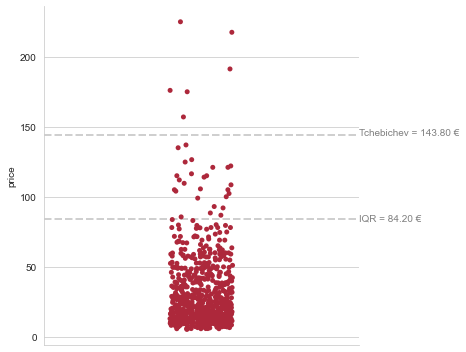

In [100]:
ax= sns.catplot(data=WebSales, y='price', kind='strip',color='#AD283B')
ax2=plt.axhline((Q3 +(Q3-Q1)*1.5), color='grey',dashes=(5, 2), label='84.20', alpha=0.5)
plt.text(x = 0.5,y=83,s = 'IQR = 84.20 €',color = 'grey')
ax3= plt.axhline(WebSales.price.mean()+ 4* WebSales.price.std(), color='grey',dashes=(5, 2), label='143.80€', alpha=0.5)
plt.text(x = 0.5,y=143.8,s = 'Tchebichev = 143.80 €',color = 'grey')

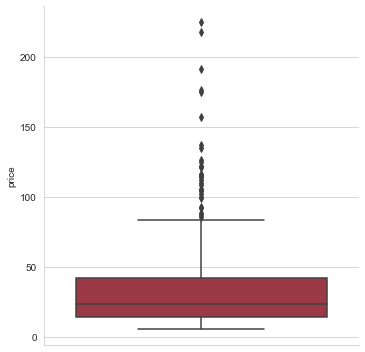

In [101]:
ax=sns.catplot(data=WebSales, y='price', kind='box',color='#AD283B' )


Nous référençons <b>32 bouteilles avec un prix supérieur à 84.20€</b> dont <b>28 actuellement en stock</b> et <b>10</b> ayant fait l'objet d'une <b>vente sur internet</b>.

In [102]:
WebSales.query("price>84.18125").sort_values(by="price",ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [103]:
print("nombre de référence de champagne vendues plus de 80.20€ :")
print(len(WebSales.query("price>84.18125")[WebSales.query("price>84.18125").post_title.str.contains("Champagne", case=False)]))
print("nombre de référence de cognac vendues plus de 80.20€ :")
print(len(WebSales.query("price>84.18125")[WebSales.query("price>84.18125").post_title.str.contains("cognac", case=False)]))
print("nombre de référence de whisky vendues plus de 80.20€ :")
print(len(WebSales.query("price>84.18125")[WebSales.query("price>84.18125").post_title.str.contains("whisky", case=False)]))

nombre de référence de champagne vendues plus de 80.20€ :
6
nombre de référence de cognac vendues plus de 80.20€ :
4
nombre de référence de whisky vendues plus de 80.20€ :
3


In [104]:
WebSales.query("price>84.18125 & Revenue>0").intent=['price','Revenue']
WebSales.query("price>84.18125 & Revenue>0")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

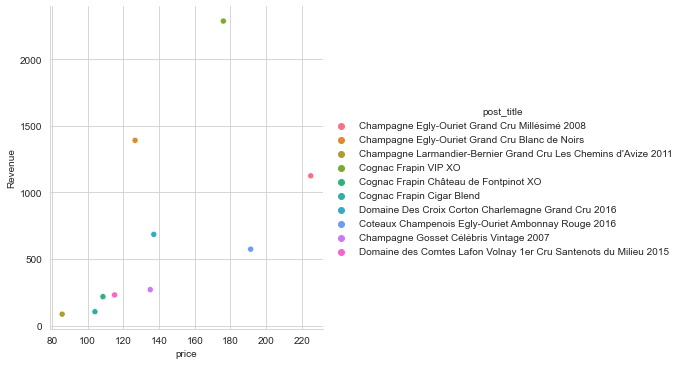

In [105]:
sns.relplot(data=WebSales.query("price>84.18125 & Revenue>0"), x='price', y='Revenue', hue='post_title')

In [106]:
WebSales.query("price>84.18125 & Revenue>0").Revenue.sum()/WebSales.Revenue.sum()

0.09876914094937407

Ces 10 références représentent presque 10% du CA réalisé en ligne.

<h3> Détection des outliers : Inégalité de Tchebychev </h3>

In [107]:
WebSales.price.mean()+ 4* WebSales.price.std()

143.7695713709754

Selon ce Théorême,<b> au moins 94% des produits vendus sur le site devraient être vendu moins de 143,80€</b>. Selon cette méthode, nous n'avons que 6 outliers. 3 seulement ont fait l'objet d'une vente sur le site.


In [108]:
WebSales.query("price>143.8")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 143.8, '143.80 €')

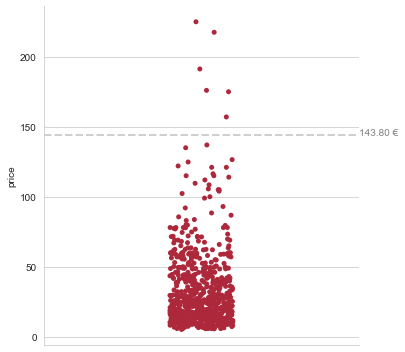

In [109]:
ax= sns.catplot(data=WebSales, y='price', kind='strip',color='#AD283B' )
ax2=plt.axhline(WebSales.price.mean()+ 4* WebSales.price.std(), color='grey',dashes=(5, 2), label='143.80€', alpha=0.5)
plt.text(x = 0.5,y=143.8,s = '143.80 €',color = 'grey')

<h3> Représentation graphique</h3>

Selon la <b>méthodes des écarts interquartiles</b>, toute bouteille vendue plus de <b>84,20€</b> est un outlier. <br> <br>
Nous référençons <b>32 bouteilles avec un prix supérieur à 84.20€</b> dont <b>28 actuellement en stock</b> et <b>10</b> ayant fait l'objet d'une <b>vente sur internet</b>.
<br><br>Selon le <b>Théorême de Tchevichev</b>,on peut considérer comme outlier toute bouteille vendue plus de <b> 143,80€</b>. <br><br>

Text(0.5, 0.98, 'Répartition prix des vins')

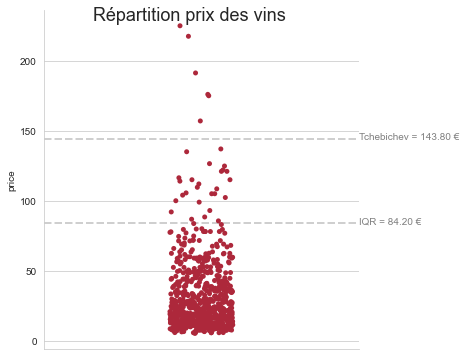

In [110]:
ax= sns.catplot(data=WebSales, y='price', kind='strip',color='#AD283B')
ax2=plt.axhline((Q3 +(Q3-Q1)*1.5), color='grey',dashes=(5, 2), label='84.20', alpha=0.5)
plt.text(x = 0.5,y=83,s = 'IQR = 84.20 €',color = 'grey')
ax3= plt.axhline(WebSales.price.mean()+ 4* WebSales.price.std(), color='grey',dashes=(5, 2), label='143.80€', alpha=0.5)
plt.text(x = 0.5,y=143.8,s = 'Tchebichev = 143.80 €',color = 'grey')
ax.fig.suptitle('Répartition prix des vins', fontsize=18)

Text(0.5, 0.98, 'Reférences vendues plus de 84.20€ et générant plus de 500€ de CA')

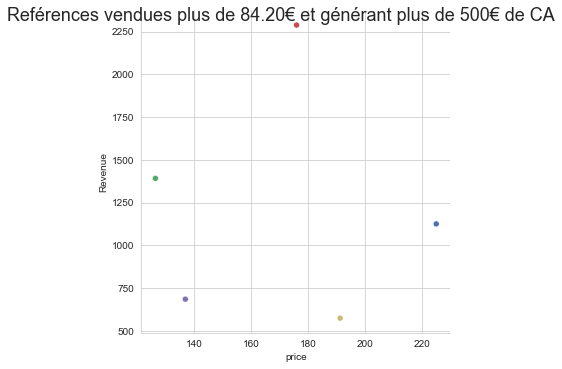

In [111]:
ax=sns.relplot(data=WebSales.query("price>84.18125 & Revenue>500"), x='price', y='Revenue', hue='post_title', legend=False)
ax.fig.suptitle('Reférences vendues plus de 84.20€ et générant plus de 500€ de CA', fontsize=18)

In [112]:
WebSales.query("price>143 & Revenue>0")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [113]:
len(WebSales.query("Revenue>0").post_title)/len(WebSales.post_title)

0.5393258426966292

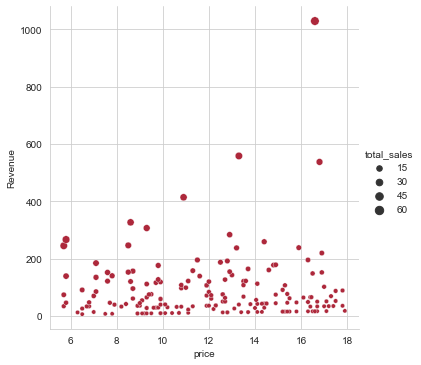

In [114]:
sns.relplot(data= WebSales.query('Revenue>0 & price <18'), x='price',y='Revenue', size='total_sales', color='#AD283B')

In [115]:
WebSales.query("Revenue>0").sort_values(by="total_sales", ascending=False).head(20)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,product_id,price,stock_quantity,total_sales,post_title,Revenue
388,4334,49.0,0,96.0,Champagne Gosset Grand Blanc de Blancs,4704.0
142,4144,49.0,11,87.0,Champagne Gosset Grand Rosé,4263.0
60,4068,16.6,157,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2
238,4200,5.8,190,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,266.8
194,4172,5.7,167,43.0,Maurel Pays d'Oc Chardonnay 2019,245.1
218,4187,13.3,90,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas 2019,558.6
1302,6206,25.2,120,41.0,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
138,4141,39.0,1,40.0,Champagne Gosset Grande Réserve,1560.0
648,4729,8.6,151,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,326.8
1250,6047,10.9,46,38.0,Château de La Liquière Faugères L'Ampoule 2019,414.2


<h1> Analyse du stock</h1>

<h2> risque de sur-stocks</h2>

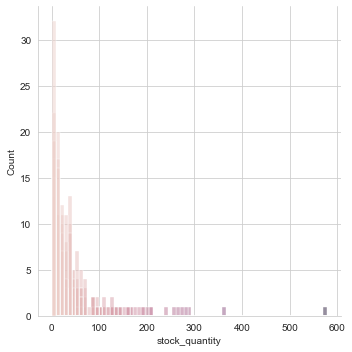

In [116]:
sns.displot(data= WebSales.query("stock_quantity>0"), x='stock_quantity', hue='stock_quantity', legend=False)

In [117]:
WebSales.query("stock_quantity >300")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [118]:
WebSales.query("stock_quantity !=0").stock_quantity.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Le domaine de Montrose Côtes de Thongue Rosé 2019 semble faire l'objet d'un stockage excessif (578 unités contre 35 en moyenne). Les rosées sont évidemment des vins à forte saisonalité mais c'est aussi des vins qui se gardent mal. <br>
Concernant le Domaine Giudiceli Patrimonio Rouge 2016, j'ai moins d'inquiétude sur le stockage.

<h2> Risque sur la valeur du stock</h2>

In [119]:
WebSales['stock_value']= WebSales.price * WebSales.stock_quantity

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3040: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
WebSales.query('stock_value>0 & stock_quantity<300').sort_values(by='stock_value', ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [121]:
WebSales.query('stock_value>0 & stock_quantity<300').stock_value.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [122]:
IQR= WebSales.query('stock_value>0  & stock_quantity<300').stock_value.quantile(0.75)+1.5*(WebSales.query('stock_value>0  & stock_quantity<300').stock_value.quantile(0.75)-WebSales.query('stock_value>0 & stock_quantity<300').stock_value.quantile(0.25))
IQR

1853.9375

Text(0.5, 1853.9375, '1854€')

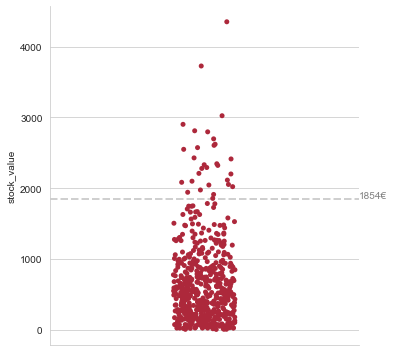

In [123]:
ax= sns.catplot(data=WebSales.query('stock_value>0 & stock_quantity<300'), y='stock_value', kind='strip',color='#AD283B')
ax2=plt.axhline((IQR), color='grey',dashes=(5, 2), label='IQR', alpha=0.5)
plt.text(x = 0.5,y=IQR,s = '1854€',color = 'grey')

In [124]:
WebSales.query('stock_value>1854 & stock_quantity<300').sort_values(by="stock_value", ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

En plus des 2 vins cités ci-dessus, <b>30 autres produits</b> mériteraient que l'on s'arrête sur les quantités stockées pour vérifier quelles sont pertinentes au regard de l'immobilisation que cela représente.